## Question 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

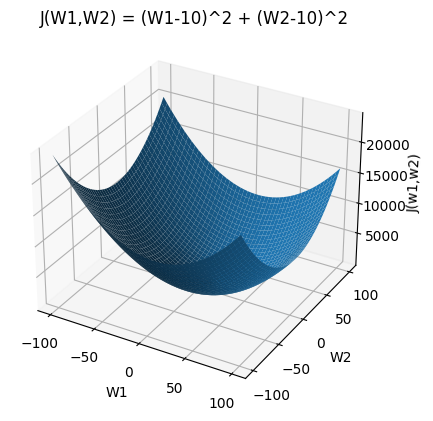

In [3]:
w1 = np.linspace(-100,100) #Defining w1 and w2
w2 = np.linspace(-100,100)
W1,W2 = np.meshgrid(w1,w2) #creating a meshgrid
J = ((W1-10)**2) + ((W2-10)**2) #Defining the J function
fig = plt.figure() #Creating a figure object
ax = fig.add_subplot(111, projection= '3d') #Adding a 3d sub plot to the figure
ax.plot_surface(W1,W2,J) #Plotting the surface
ax.set_xlabel('W1') #setting all the labels
ax.set_ylabel('W2')
ax.set_zlabel('J(w1,w2)')
ax.set_title('J(W1,W2) = (W1-10)^2 + (W2-10)^2')
plt.show()

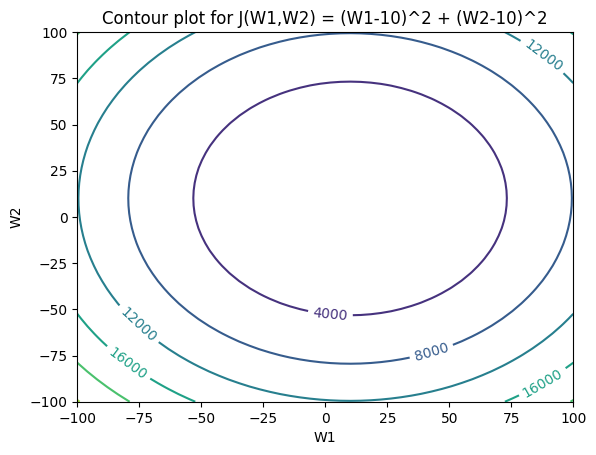

In [4]:
fig,ax = plt.subplots() #Creating a figure and subplot
cs = ax.contour(W1,W2,J) #Creating a contour object
ax.clabel(cs,inline = 1) #Passing the object to clabel function
ax.set_xlabel('W1') #setting the labels
ax.set_ylabel('W2')
ax.set_title('Contour plot for J(W1,W2) = (W1-10)^2 + (W2-10)^2')
plt.show()

## Question 2

In [5]:
def bracketing(a,b,n) -> tuple:  #Defining a function for bracketing
    dw = (b-a)/n  #defining del w
    w1 = a        #initialising w1,w2,w3
    w2 = a+dw
    w3 = w2+dw
    while True:
        if w3<=b:
            if(((w1**2) + (54/w1) >= (w2**2) + (54/w2)) and ((w2**2) + (54/w2) <= (w3**2) + (54/w3))): #Checking the condition J(w1)<=J(w2)<=J(w3)
                return ((w1,w3)) #returning the range in which the critical point is
            else:
                w1 = w2      #If the condition is false, updating w1,w2,w3
                w2 = w3
                w3 = w2+dw
        else:
            return 0

In [6]:
a,b = bracketing(0.1,8,10)  
print(a,b) #printing the bracket value

2.47 4.050000000000001


In [7]:
def interval_halving(a,b,e) -> float:  #defining a function for interval_halving
    wm = (a+b)/2  #defining wm,l,w1,w2
    l = b-a
    w1 = a+(l/4)
    w2 = b-(l/4)
    while abs(l)>e: #running the loop till the length factor (distance between a and b) is greater than epsilon
        if((w1**2) + (54/w1) < (wm**2) + (54/wm)): #if J(w1) < J(wm) excluding the half between wm and b
            b = wm
            wm = w1
            l = b-a
        elif((w2**2) + (54/w2) < (wm**2) + (54/wm)): #if J(w2) < J(wm) excluding the half between wm and a
            a = wm
            wm = w2
            l = b-a
        else:
            return wm
    return (wm)

In [8]:
e = 0.0001
print(interval_halving(a,b,e)) #The optimal point according to interval_halving

2.865


In [9]:
def newton_raphson(w,k,e) -> float: #defning function for newton_raphson
    J1 = 2*w - 54/w**2  #First derivative J(W)'
    J2 = 2 + 108/w**3   #Second derivative J(W)"
    for i in range(k):  #iterating for number of iterations given by users
        if(abs(J1)<e):  
            break       #breaking out of the loop if the slope is less than a desired value
        else: 
            w  -= J1/J2         #updating w according to W(k+1) = W(K) - J(W)'/J(W)"
            J1 = 2*w - 54/w**2  #calculating J' and J"
            J2 = 2 + 108/w**3
    return w

In [10]:
print(newton_raphson(0.5,100,e))

2.99999999825058


## Question 3

In [11]:
def interval_halving(a,b,e) -> float:   
    wm = (a+b)/2
    l = b-a
    w1 = a+(l/4)
    w2 = b-(l/4)
    while l > e:
        if(np.sin(w1) > np.sin(wm)):   #As we are finging the local "maximum" for sin(W), the new condition is J(w1)>J(wm)
            b = wm
            wm = w1
        elif(np.sin(w2) > np.sin(wm)): #J(w2)>J(wm)
            a = wm
            wm = w2
        else:
            return(wm)
    return (wm)

In [12]:
int_half = interval_halving(0,np.pi,0.0001)
print(int_half)

1.5707963267948966


In [13]:
def newton_raphson(w,k,e) -> float:
    J1 = np.cos(w)   #changing the J' and J" for sin(W)
    J2 = -np.sin(w)
    for i in range(k):
        if(abs(J1)<e):
            break
        else:
            w -= J1/J2
            J1 = np.cos(w)
            J2 = -np.sin(w)
    return w

In [14]:
new_rap = newton_raphson(0.5,100,0.01)
print(new_rap)

1.5731225635727124


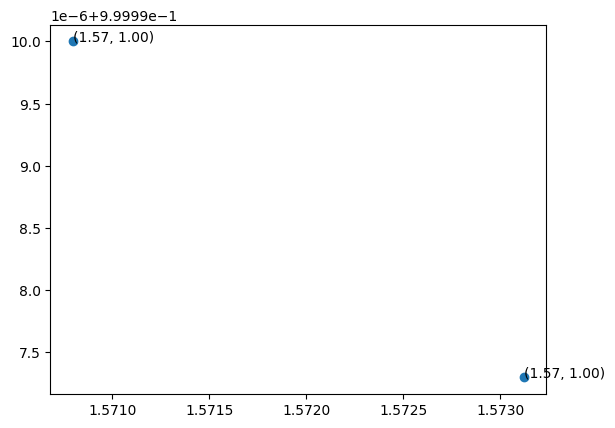

In [15]:
x = [int_half, new_rap]
y = [np.sin(x) for x in x]
plt.scatter(x,y)
for xy in zip(x,y):
     plt.annotate('(%.2f, %.2f)' % xy, xy=xy) #annotating using plt.annotate
plt.show()